# Praktische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

6 oktober 2025


## 1 Classifying the CIFAR10 Dataset

In this exercise we are going to classify images belonging to 10 different classes,namely airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships and trucks.

### 1.1 Load the Data

1. Start by loading the dataset. This is a built-in dataset in keras, see https://keras.io/api/datasets/cifar10/#load_data-function for detailed information. Use the following code


In [1]:
import keras as ks

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = ks.datasets.cifar10.load_data()

2. Write code to check shape of the training and the test set. Interpret this shape, i.e. understand what each number means


In [3]:
print("--- Train ---")
print("X_train_full shape", X_train_full.shape)
print("y_train_full shape", y_train_full.shape)
analyse_X_shape = (f"Analyse van de X_train_full {X_train_full.shape}\n" +
                   f"{X_train_full.shape[0]}: aantal items of rijen\n" +
                   f"{X_train_full.shape[1], X_train_full.shape[2]}: spatiale dim. (hoogte & breedte)\n" +
                   f"{X_train_full.shape[3]}: aantal kanalen (RGB"
                   )
print(analyse_X_shape)
print("--- Test ---")
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
analyse_y_shape = (f"Analyse van de Shape {y_train_full.shape}\n" +
                   f"{y_train_full.shape[0]}: aantal items of rijen\n" +
                   f"{y_train_full.shape[1]}: categorie"
                   )
print(analyse_y_shape)

--- Train ---
X_train_full shape (50000, 32, 32, 3)
y_train_full shape (50000, 1)
Analyse van de X_train_full (50000, 32, 32, 3)
50000: aantal items of rijen
(32, 32): spatiale dim. (hoogte & breedte)
3: aantal kanalen (RGB
--- Test ---
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)
Analyse van de Shape (50000, 1)
50000: aantal items of rijen
1: categorie


3. Use the last 10000 examples from the training set as the validation set. The other examples will be used as training set. Write code to create the validation and training data


In [4]:
X_val = X_train_full[-10000:]
y_val = y_train_full[-10000:]
print("--- Val set ---")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {X_val.shape}")
X = X_train_full[:-10000]
y = y_train_full[:-10000]
print("--- Train set ---")
print(f"X shape: {X.shape}")
print(f"X shape: {y.shape}")

--- Val set ---
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 32, 32, 3)
--- Train set ---
X shape: (40000, 32, 32, 3)
X shape: (40000, 1)


### 1.2 Some Data Exploration

1. Give the number of examples for each of the ten categories


In [5]:
import numpy as np

categories, counts = np.unique(y, return_counts=True)

for categorie, count in zip(categories, counts):
    print(f"Categorie {categorie}: {count} voorbeelden")

Categorie 0: 3986 voorbeelden
Categorie 1: 3986 voorbeelden
Categorie 2: 4048 voorbeelden
Categorie 3: 3984 voorbeelden
Categorie 4: 4003 voorbeelden
Categorie 5: 3975 voorbeelden
Categorie 6: 4020 voorbeelden
Categorie 7: 4023 voorbeelden
Categorie 8: 3997 voorbeelden
Categorie 9: 3978 voorbeelden


2. Show the first 25 examples in a 5 by 5 grid, each time showing the class(label) of each example along with the image. For your convenience, we give a list containing the class names:


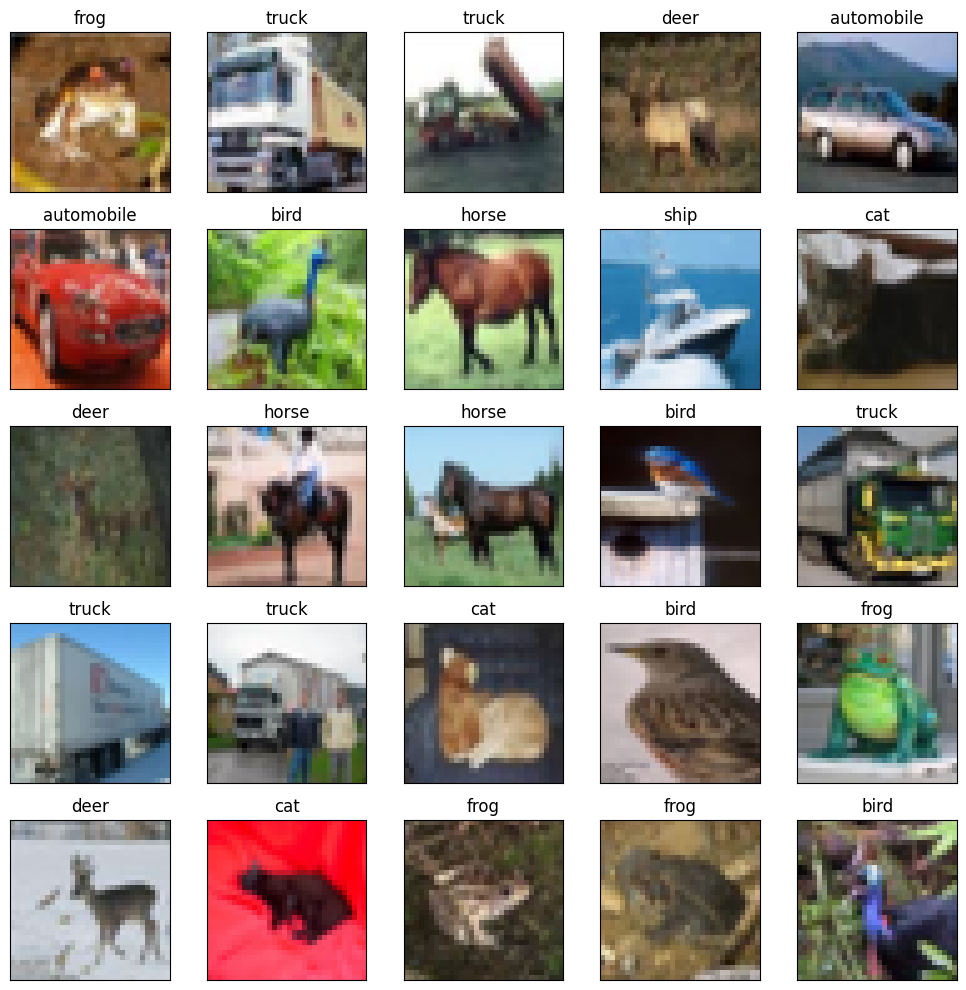

In [6]:
import matplotlib.pyplot as plt

class_names = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X[i])

    label_index = y_train_full[i][0]
    plt.title(class_names[label_index])

plt.tight_layout()
plt.show()

### 1.3 Build a Model

Build a model using the Sequential API. Write a function `get_model()` that returns a model with the following architecture:

-   An `Input` object that specifies the shape of each image.
-   A `Rescaling` layer which scales the inputs (that are currently between 0 and 255) to the range[0, 1].
-   A `Conv2D` layer with 32 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
-   `Conv2D` layer with 32 filters, kernel size equal to (3, 3), padding=same and the **relu** activation function.
-   A `max pooling` layer with pool size equal to(2, 2).
-   A `Conv2D` layer with 64 filters, kernel size equal to(3, 3), padding=sameand thereluactivation function.
-   A `Conv2D` layer with 64 filters, kernel size equal to(3, 3), padding=sameand the relu activation function.
-   A `max pooling` layer with pool size equal to (2, 2).
-   A `Flatten` layer that transforms each example to a long one dimensional tensor.
-   A `Dense` layer with 128 units and thereluactivation function.
-   A `Dense output` layer.
    -   How many units should this layer have?
    -   What is the most appropriate activation function for this layer, given that we are doing classification into 10 classes?


In [7]:
def get_model():
    return ks.Sequential([
        # * Input shape (32,32,3)
        ks.layers.Input(shape=(32, 32, 3), name="input"),

        # * Rescaling layer [0,1]
        ks.layers.Rescaling(scale=1./255, name="rescale"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2), name="maxpool_1"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2),
                            name="maxpool_2"),

        # * Flatten layer
        ks.layers.Flatten(name="flatten"),

        # * Dense layer
        ks.layers.Dense(units=128,
                        activation="relu",
                        name="dense"),

        # * Output Dense layer
        ks.layers.Dense(units=10,
                        activation="softmax",
                        name="output"),])


model = get_model()
model.summary()

2025-12-26 15:43:52.539157: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-26 15:43:52.539185: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-26 15:43:52.539191: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-26 15:43:52.539325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-26 15:43:52.539338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### 1.4 Compile the Model

1. Compile the model.
    - (a) Use the Adam the optimizer with a learning rate of 1/1000.
    - (b) Specify the correct loss function for this classification problem and track the percentage of correctly classified images


In [8]:
model.compile(
    optimizer=ks.optimizers.Adam(learning_rate=1/1000),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### 1.5 Train the Model

1. Train the model for a large number of epochs.
2. Use early stopping (and the validation data) to prevent (severe) overfitting.
3. Use the history object returned by the `fit()` method to plot the learning curves. You can use the code given below to plot the learning curves.


Epoch 1/100


2025-12-26 15:43:53.347093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.4529 - loss: 1.5201 - val_accuracy: 0.5430 - val_loss: 1.3008
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5532 - loss: 1.5368 - val_accuracy: 0.3113 - val_loss: 4.8084
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4517 - loss: 15.1958 - val_accuracy: 0.4332 - val_loss: 40.2831
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4196 - loss: 414.7752 - val_accuracy: 0.3819 - val_loss: 1284.4346
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3885 - loss: 6983.0195 - val_accuracy: 0.3649 - val_loss: 15800.8525


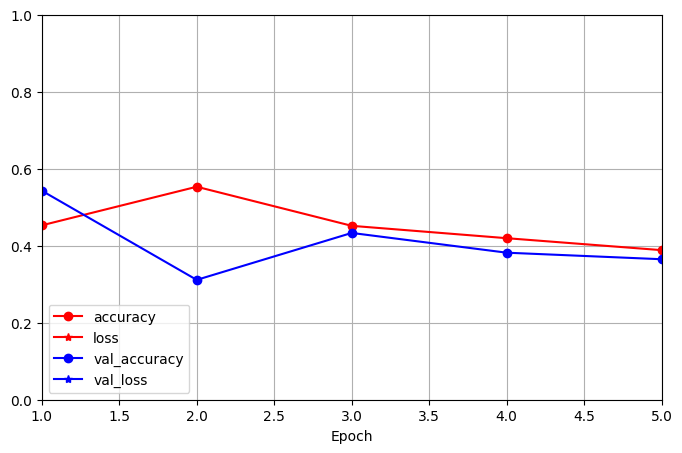

In [9]:
his_model = model.fit(
    x=X_train_full,
    y=y_train_full,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[
        ks.callbacks.EarlyStopping(patience=4)
    ]
)


def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history["loss"]), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()


plot_learning_curves(his_model)

### 1.6 Evaluate the Model

1. Use the evaluate() method to evaluate the model on the test set.
    - (a) What is the performance of the model on the test set
        > [1m313/313[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m2s[0m 6ms/step - accuracy: 0.3482 - loss: 1106232.2500
        > Test Loss: 1106232.25
        > Test Accuracy: 34.82%


In [10]:
result = model.evaluate(X_test, y_test)
# Results is een lijst: [loss, accuracy]
print(f"Test Loss: {result[0]}")
print(f"Test Accuracy: {result[1] * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3621 - loss: 16105.5684
Test Loss: 16105.568359375
Test Accuracy: 36.21%


2. Write a function with the following signature:


In [11]:
def get_predictions(model, X, keepdims=False):
    """
    model: a keras model
    X: tensor of shape (batch_size,height,width,channels)
    keepdims: if True,the output tensor has rank 2, otherwise it has rank 1

    Returns: the predictions for X either as (batch_size,) or (batch_size,1)
    """
    y_pred = model.predict(X)
    return ks.ops.argmax(y_pred, axis=1, keepdims=keepdims)

This function should return the actual class predictions made by the model.
This function should have at most two lines of code.


3. Use the method above to check the accuracy of the model on the validation set by comparing the output of this method to y_valid.
    - (a) You should recognize this number from the output produced by the `fit()` method.


In [12]:
y_valid_pred = get_predictions(model, X_val, keepdims=True)
print(ks.ops.mean(y_valid_pred == y_val))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
tf.Tensor(0.3649, shape=(), dtype=float32)


4. Write a function that identifies incorrectly classified images:


In [13]:
def get_incorrectly_predicted_images(model, X, y_true):
    """
    model: the trained model
    X: tensor of shape (n, image_shape), the images
    y_true: actual labels (n, 1) (or (n,))

    Returns: three tensors of shape (m, image_shape), (m,), (m,)
        incorrectly_classified_images, predicted_labels, expected_labels
    """
    assert X.shape[0] == y_true.shape[0], "dimensions wrong"
    y_pred = get_predictions(model, X, keepdims=y_true.ndim == 2)

    # ? Neem de array met incorrecte voorspellingen
    selector = (ks.ops.squeeze(y_pred) != ks.ops.cast(
        ks.ops.squeeze(y_true), y_pred.dtype))

    return X[selector], ks.ops.squeeze(y_pred[selector]), ks.ops.squeeze(y_true[selector])

5. Apply the above function to the test set and plot a 5 by 5 grid showing 25 wrongly classified images. Show both the predicted and the actual class sabove each image.


In [14]:
incorrectly_classified_images, predicted_labels, expected_labels = (
    get_incorrectly_predicted_images(model, X_test, y_test)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
incorrectly_classified_images.shape, predicted_labels.shape, expected_labels.shape

((6379, 32, 32, 3), TensorShape([6379]), TensorShape([6379]))

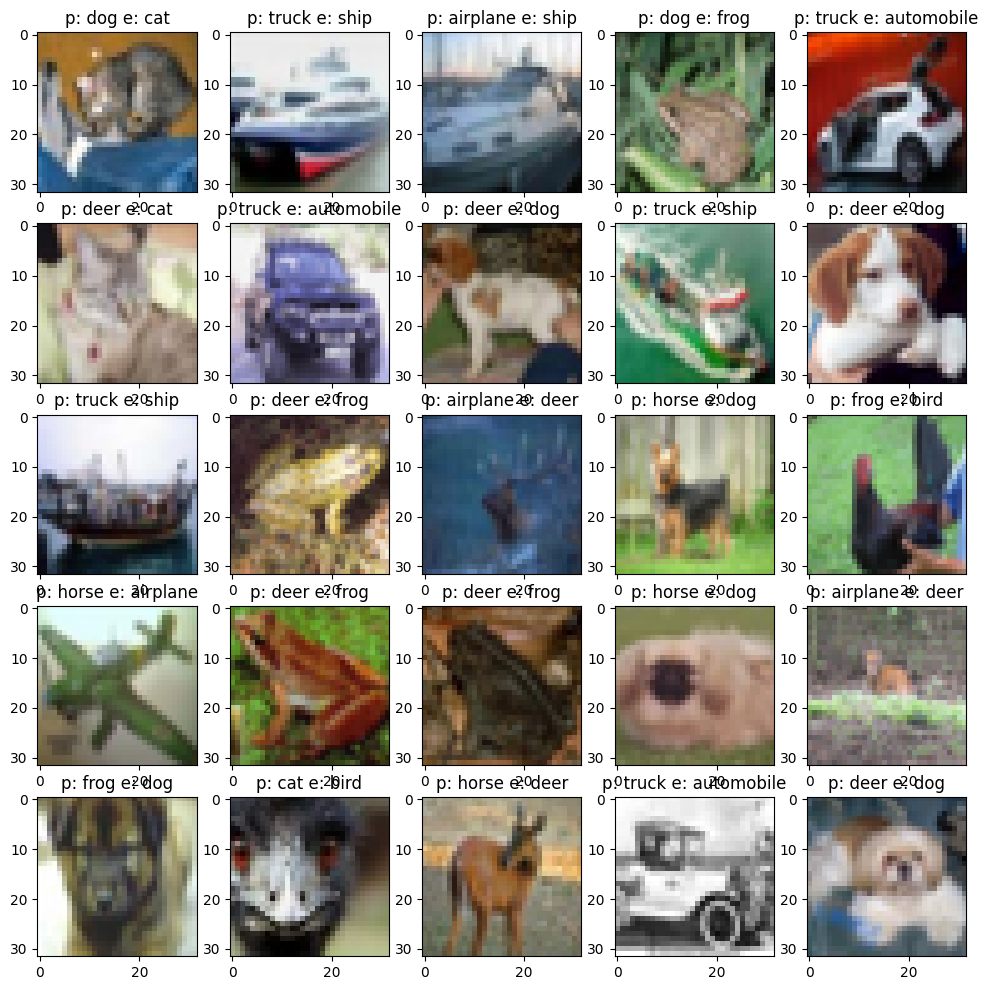

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(incorrectly_classified_images[i])
    plt.title(
        f"p: {class_names[predicted_labels[i]]} e: {class_names[expected_labels[i]]}")

6. Finally, use a tensorflow method to create a confusion matrix for the test set. The rows should contain the actual classes, the columns are the predicted classes. Use the code below to display the confusion matrix.


In [ ]:
import tensorflow as tf
import seaborn as sns
cm = tf.math.confusion_matrix(
    y_test.squeeze(),
    get_predictions(model, X_test)
)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[763,   1,  13,   1,  54,   6,  40,  56,   2,  64],
       [223,  97,   6,   7, 116,   9,  49,  32,   6, 455],
       [184,   0,  99,  12, 416,  46, 112, 112,   0,  19],
       [ 76,   0,  15,  60, 399,  95, 191, 123,   0,  41],
       [ 83,   1,  17,   5, 646,  11,  67, 161,   0,   9],
       [ 48,   0,  40,  34, 316, 222, 132, 189,   1,  18],
       [ 28,   0,   8,  18, 426,  62, 379,  51,   0,  28],
       [ 49,   0,   9,   3, 256,  38,  35, 582,   0,  28],
       [622,   4,   1,   6,  43,   5,  34,  33,  95, 157],
       [115,   5,   4,   5,  43,   8,  76,  65,   1, 678]], dtype=int32)>

[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

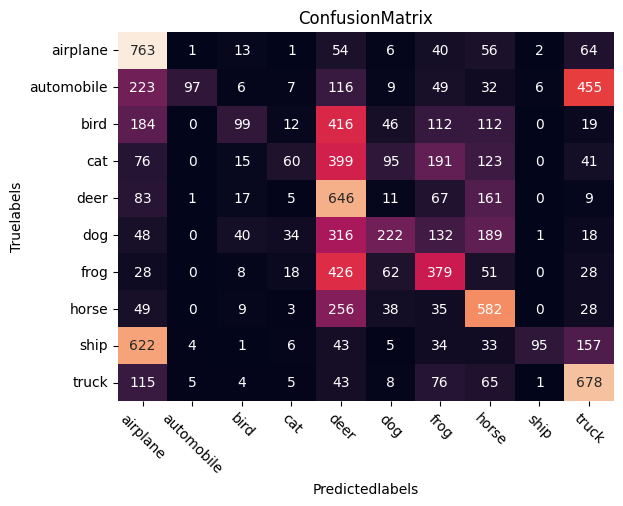

In [18]:
ax = plt.subplot()
# annot=Truetoannotatecells,ftm="g"todisablescientificnotation
sns.heatmap(cm, annot=True, fmt="g", ax=ax, cbar=False)
# labels,titleandticks
ax.set_xlabel("Predictedlabels")
ax.set_ylabel("Truelabels")
ax.set_title("ConfusionMatrix")
ax.xaxis.set_ticklabels(class_names, rotation=-45)
ax.yaxis.set_ticklabels(class_names, rotation=0)

### 1.7 Try to Improve the Model

Try to improve the model (i.e. try to achieve a higher accuracy). Things youcould try:

-   Add an additional convolutional block.
-   Add dropout to the network to prevent overfitting. See Chapter 11.
-   Try different initialization of the weights.
-   Try to continue the training with a decreased learning rate.
-   Use Monte Carlo dropout to make predictions.


In [ ]:
def get_model():
    return ks.Sequential([
        # * Input shape (32,32,3)
        ks.layers.Input(shape=(32, 32, 3), name="input"),

        # * Rescaling layer [0,1]
        ks.layers.Rescaling(scale=1./255, name="rescale"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2), name="maxpool_1"),

        #! Dropout layer with rate 0.2
        ks.layers.Dropout(0.2),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2),
                            name="maxpool_2"),

        #! Dropout layer with rate 0.3
        ks.layers.Dropout(0.3),

        # * Flatten layer
        ks.layers.Flatten(name="flatten"),

        # * Dense layer
        ks.layers.Dense(units=128,
                        activation="relu",
                        name="dense"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),
        #! Dropout layer with rate 0.5
        ks.layers.Dropout(0.5),
        # * Output Dense layer
        ks.layers.Dense(units=10,
                        activation="softmax",
                        name="output"),])


model = get_model()

In [ ]:

model.compile(
    optimizer=ks.optimizers.Adam(learning_rate=1/1000),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4599 - loss: 1.5692 - val_accuracy: 0.6180 - val_loss: 1.0956
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6211 - loss: 1.0799 - val_accuracy: 0.7021 - val_loss: 0.8531
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6729 - loss: 0.9425 - val_accuracy: 0.6509 - val_loss: 1.0479
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7016 - loss: 0.8646 - val_accuracy: 0.7521 - val_loss: 0.7284
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7240 - loss: 0.8001 - val_accuracy: 0.7938 - val_loss: 0.6045
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7378 - loss: 0.7612 - val_accuracy: 0.8038 - val_loss: 0.5785
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7512 - loss: 0.7270 - val_accuracy: 0.8020 - val_loss: 0.5753
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 

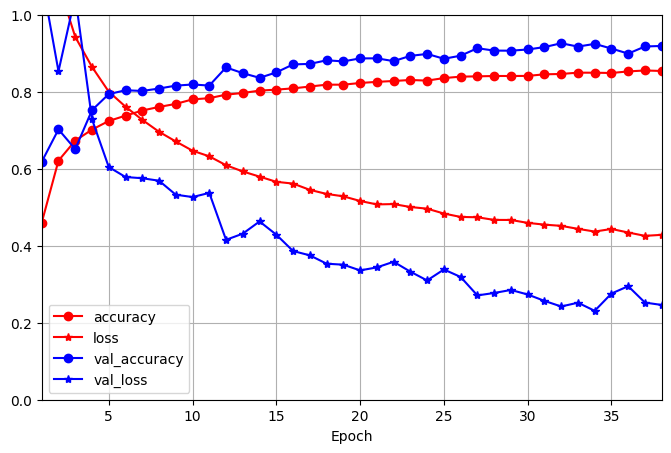

In [21]:

his_model = model.fit(
    x=X_train_full,
    y=y_train_full,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[
        ks.callbacks.EarlyStopping(patience=2)
    ]
)
plot_learning_curves(his_model)

## 2 Practicing with the Functional API and the `Layer` class

### 2.1 Implementing a Residual Unit

On page 515 of the book you can see an implementation of the ResidualUnit class, which is a core component of the ResNet architecture. In the book a classis created which is a subclass of thekeras.layers.Layerclass. For your convenience, this code is reproduced in Figure1. Note thatLayeris subclassed andnotModel, because our intention is to use the class as part of a larger model

#### 2.1.1 Rewrite ResidualUnit as a Method using the Functional API


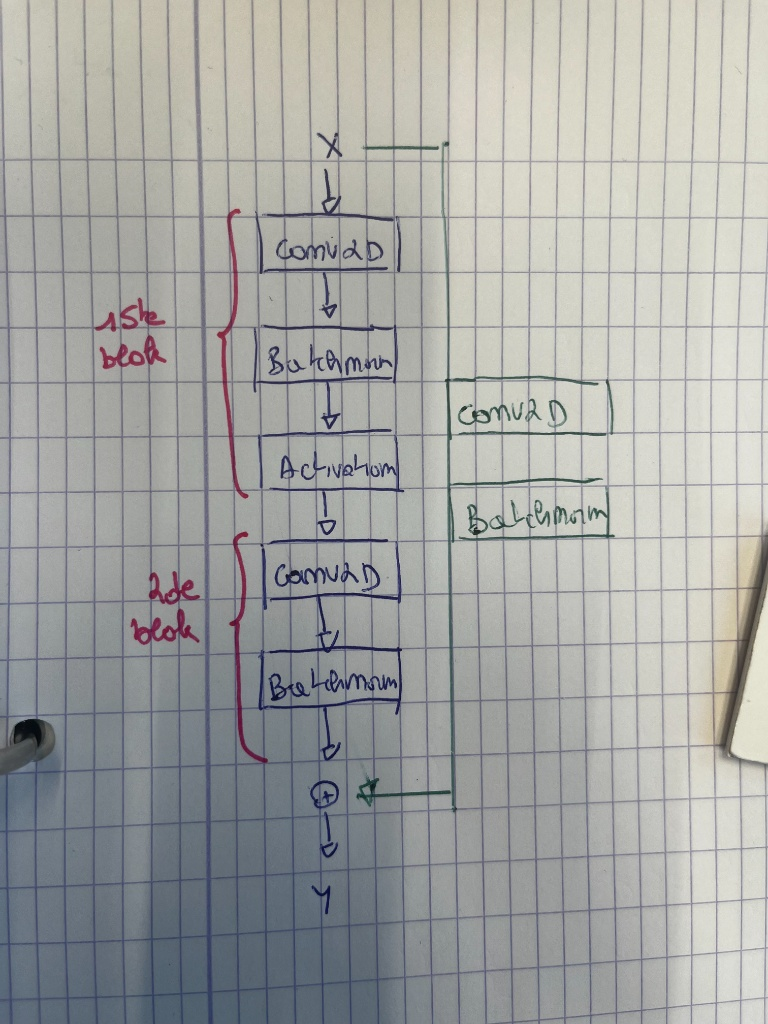


In [ ]:
from functools import partial

DefaultConv2D = partial(ks.layers.Conv2D, kernel_size=3,
                        strides=1, padding="same",
                        kernel_initializer="he_normal",
                        use_bias=False)


def residual_unit(input_, filters, strides=1, activation="relu"):
    activation_layer = ks.activations.get(activation)
    # * Eerste blok van Main
    main = DefaultConv2D(filters, strides=strides)(input_)
    main = ks.layers.BatchNormalization()(main)
    main = activation_layer(main)
    # * Twee blok van Main
    main = DefaultConv2D(filters)(main)
    main = ks.layers.BatchNormalization()(main)

    # * Skip connection
    skip = input_
    if strides > 1:
        skip = DefaultConv2D(filters, strides=strides)(skip)
        skip = ks.layers.BatchNormalization()(skip)

    # * Samenvoegen
    z = ks.layers.Add()([main, skip])
    return ks.layers.Activation(activation)(z)

Check that the code indeed behaves identically by completing the code in Figure 2


In [32]:
DefaultConv2D = partial(ks.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal", use_bias=False)


class ResidualUnit(ks.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = ks.activations.get(activation)
        self.main_layers = [DefaultConv2D(filters, strides=strides),
                            ks.layers.BatchNormalization(),
                            self.activation, DefaultConv2D(filters),
                            ks.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [DefaultConv2D(filters, kernel_size=1, strides=strides),
                                ks.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
TEST_SHAPE = (128, 128, 50)
model1 = ks.Sequential([ks.layers.Input(shape=TEST_SHAPE),
                        ResidualUnit(filters=50)])

input_ = ks.layers.Input(shape=TEST_SHAPE)
output = residual_unit(input_, filters=50)

model2 = ks.Model(inputs=input_, outputs=output)

# Ask for summary of both models and check(visually) that the
# number of parameters is the same.

print("--- Model1 ---")
model1.summary()
print("--- Model2 ---")
model2.summary()
# Create a random tensor to serve as input.
# The tensor should have a batch size equal to one.
X = ks.random.uniform(shape=(1,)+TEST_SHAPE,
                      minval=0.0,
                      maxval=1.0)
print(X.shape)
# Check the shape of the output when calling model1 and model2 on X.
# Is this shape what you expect?
result_1 = model1(X)
print(f"result_1: {result_1.shape}")
result_2 = model2(X)
print(f"result_2: {result_2.shape}")

# Copy the weights from the second model into the firstmodel.
model1.set_weights(model2.get_weights())

# Combine keras.ops.isclose and keras.ops.all to check that the
# output of both models is now identical.

ops_isclose = ks.ops.isclose(result_1, result_2)
ops_all = ks.ops.all(result_1, axis=1)
print("ops_all 1:")
print(ops_all)
ops_all = ks.ops.all(result_2, axis=1)
print("ops_all 2:")
print(ops_all)

print("isclose:")
print(ops_isclose)
print("ops_all:")
print(ops_all)

--- Model1 ---


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ residual_unit_20 (ResidualUnit) │ (None, 128, 128, 50)   │        45,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,400 (177.34 KB)

 Trainable params: 45,200 (176.56 KB)

 Non-trainable params: 200 (800.00 B)

--- Model2 ---


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 128, 128,  │     22,500 │ input_layer_41[0… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_90[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_91 (Conv2D)  │ (None, 128, 128,  │     22,500 │ re_lu_20[0][0]    │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_91[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │ input_layer_41[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 128, 128,  │          0 │ add_20[0][0]      │
│ (Activation)        │ 50)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45,400 (177.34 KB)

 Trainable params: 45,200 (176.56 KB)

 Non-trainable params: 200 (800.00 B)

(1, 128, 128, 50)
result_1: (1, 128, 128, 50)
result_2: (1, 128, 128, 50)
ops_all 1:
tf.Tensor(
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [ True False False ...  True False False]]], shape=(1, 128, 50), dtype=bool)
ops_all 2:
tf.Tensor(
[[[False False  True ... False False False]
  [False False  True ... False False False]
  [False False  True ...  True False False]
  ...
  [False False  True ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]], shape=(1, 128, 50), dtype=bool)
isclose:
tf.Tensor(
[[[[False False False ... False False False]
   [False  True False ... False False False]
   [False False False ... False False False]
   ...
   [False False False ... False False False]
   [False False False ... False False False]
   [False False Fals

#### 2.1.2 Write a method that returns a Model.

Complete the following method, which performs (once more) the same computation as the `ResidualUnit` class but wraps this computation inside a model.

Use the name parameter to pass a name to the model when you create it. Eventhough this method returns a Model, its return value can still be used inside a larger model.


In [ ]:
def residual_unit_model(input_shape,
                        filters, strides=1,
                        activation="relu",
                        name=None) -> ks.Model:
    input_ = ks.layers.Input(shape=input_shape)
    output = residual_unit(input_, filters=filters)
    return ks.Model(input_, output)


model3 = residual_unit_model(TEST_SHAPE, filters=50)

In [ ]:
def get_model(mode="sequential"):
    if mode == "sequential":
        return ks.Sequential([ks.layers.Input(shape=TEST_SHAPE),
                              ResidualUnit(filters=50)])

    input_ = ks.layers.Input(shape=TEST_SHAPE)
    output = residual_unit(input_, filters=50)
    return ks.Model(inputs=input_, outputs=output)


model1.summary()
model2.summary()
model3.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ residual_unit_20 (ResidualUnit) │ (None, 128, 128, 50)   │        45,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,400 (177.34 KB)

 Trainable params: 45,200 (176.56 KB)

 Non-trainable params: 200 (800.00 B)

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 128, 128,  │     22,500 │ input_layer_41[0… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_90[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_91 (Conv2D)  │ (None, 128, 128,  │     22,500 │ re_lu_20[0][0]    │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_91[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │ input_layer_41[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 128, 128,  │          0 │ add_20[0][0]      │
│ (Activation)        │ 50)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45,400 (177.34 KB)

 Trainable params: 45,200 (176.56 KB)

 Non-trainable params: 200 (800.00 B)

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_44      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 128, 128,  │     22,500 │ input_layer_44[0… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_23 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 128, 128,  │     22,500 │ re_lu_23[0][0]    │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        200 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_23 (Add)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 50)               │            │ input_layer_44[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 128, 128,  │          0 │ add_23[0][0]      │
│ (Activation)        │ 50)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 45,400 (177.34 KB)

 Trainable params: 45,200 (176.56 KB)

 Non-trainable params: 200 (800.00 B)

## 2.2 Build a Convolutional Layer from Scratch

In this exercise, we will build a convolutional layer by subclassing the Layer class. By leveraging thebuildmethod of this class our layer will be very flexible to use, just as the built-in convolutional layers in Keras.

We will implement a class MyConv2D that performs a 2D convolution where one can only specify the number of filters and the activation function. The kernel is always a square (in the spatial directions). All other options are “fixed”. An outline of the class in given in Figure 3. A similar example can be found onhttps://keras.io/api/layers/base_layer/.

1. The `__init__` method is the constructor of the class. In this method,we only store the values of the 3 parameters that are passed (filters, kernel_size, activation) Convert the activation string to an object.

    **Note** that _kernel_size_ should be an integer as we assume that the kernel size is always a square in the spatial directions


In [76]:
class MyConv2D(ks.layers.Layer):

    def __init__(self,
                 filters: int,
                 kernel_size: int,
                 activation: str, **kwargs):
        super().__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = ks.activations.get(activation)

    def build(self, batch_input_shape):
        _, _, channels_in = batch_input_shape[1:]
        self.kernel = self.add_weight(
            shape=(self.kernel_size, self.kernel_size, channels_in, self.filters),
            initializer="he_normal",
            name="kernel")

        self.bias = self.add_weight(
            shape=(self.filters,),
            initializer="zeros",
            name="bias",
        )

    def call(self, inputs):
        return self.activation(
            ks.ops.conv(inputs, self.kernel) + self.bias
        )

my_conv2d=MyConv2D(filters=32,kernel_size=3,activation='relu')
conv2d=ks.layers.Conv2D(filters=32,kernel_size=3,activation='relu')


X=tf.random.normal(shape=(1,256,256,3))
# Make sure the weights are present by calling the layers
print(my_conv2d(X).shape)
print(conv2d(X).shape)

(1, 254, 254, 32)
(1, 254, 254, 32)


## 3  Implementing GoogleNet
### 3.1  Introduction
In this exercise we will build the GoogleNet architecture and we will test it onthe CIFAR10 dataset. Figure4gives an overview of this network. The image in this figure is taken from the book, but has been altered at one point to fixa mistake in the book’s image: the first inception module doesn’t have a layerwith 12 filters (as in the book) but instead should use 16 filters. This is how it isdocumented in the original paper2.

GoogLeNet uses something called an “Inception Module”, whose details are shown in Figure5. Each blue rectangle in this figure represents a convolutional layer.

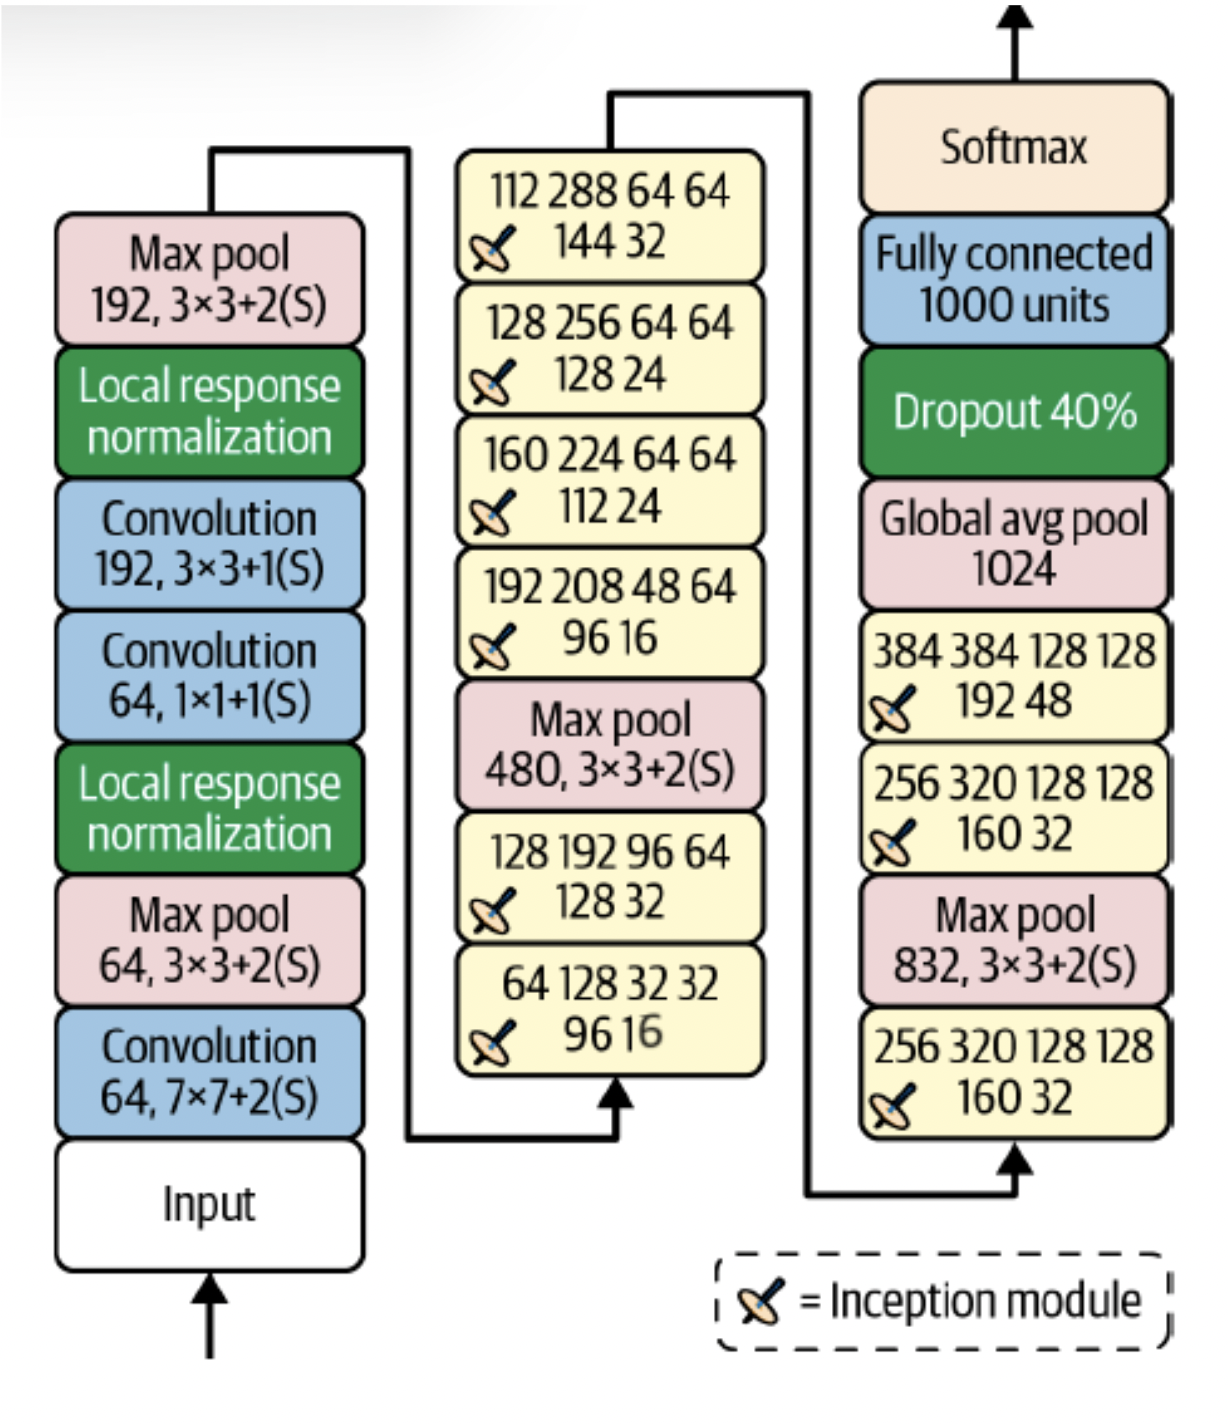
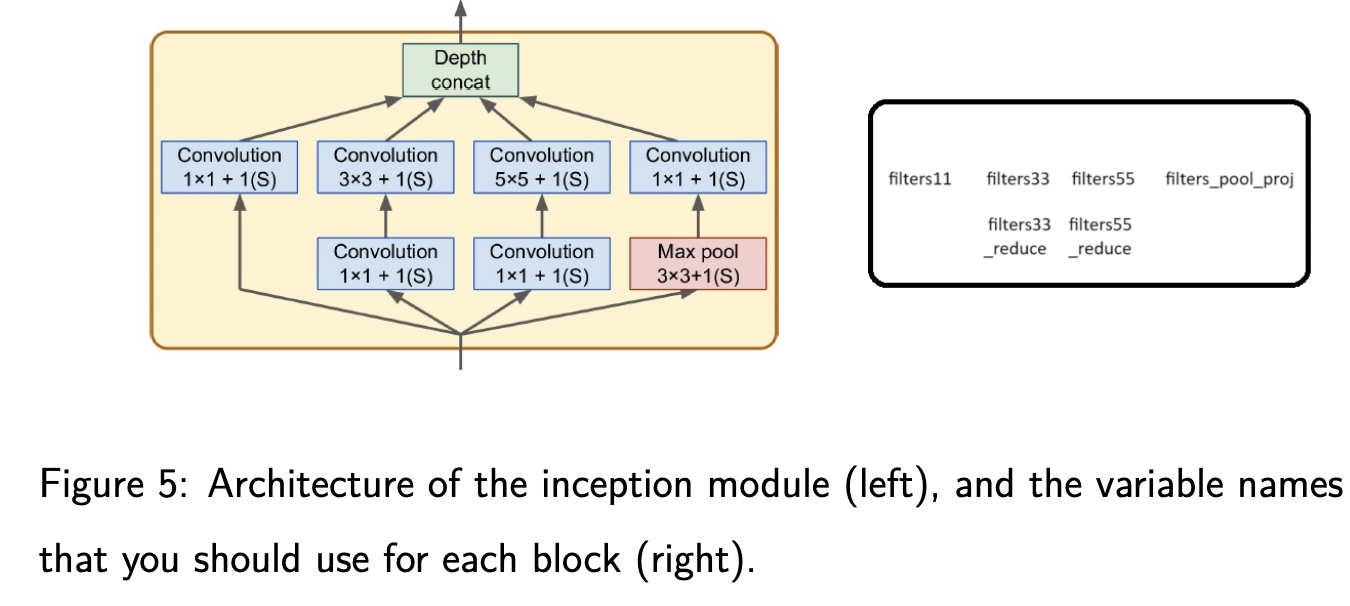

## 3.2  Implement the Inception Module
Implement the inception module by subclassing thekeras.layers.Layerclass.Page 515 in the book shows an example of how to implement a custom layer asa subclass of the keras.layers.Layer class. Start from the code in Figure6.1.Complete the `__init__` method. Refer to Figure 5.
- (a) Create the convolutional layer at the left. UseDefaultConvandfilters11. (This is already done in the starter code.)

In [104]:
import functools
DefaultConv = functools.partial(ks.layers.Conv2D,
                                kernel_size=(1, 1),
                                strides=(1, 1),
                                padding="same",
                                activation="relu")


class InceptionModule(ks.layers.Layer):

    def __init__(self, filters11, filters33_reduce, filters33, filters55_reduce, filters55, filters_pool_proj, use_batch_norm=True, **kwargs):
        super().__init__(**kwargs)
        self.conv11 = DefaultConv(filters=filters11, name="filters11")
        self.conv33 = DefaultConv(filters=filters33,kernel_size=(3,3), name="filters33")
        self.conv55 = DefaultConv(filters=filters55, kernel_size=(5,5),name="filters55")
        self.pool_proj = DefaultConv(
            filters=filters_pool_proj, name="filters_pool_proj")

        self.conv33_reduce = DefaultConv(
            filters=filters33_reduce, name="filters33_reduce")
        self.conv55_reduce = DefaultConv(
            filters=filters55_reduce, name="filters55_reduce")
        self.use_batch_norm = use_batch_norm
        self.batch = ks.layers.BatchNormalization()
    def call(self, inputs):
        path1 = self.conv11(inputs)

        path2 = self.conv33_reduce(inputs)
        path2 = self.conv33(path2)

        path3 = self.conv55_reduce(inputs)
        path3 = self.conv55(path3)

        path4 = ks.layers.MaxPool2D(pool_size=(3, 3), padding="same", strides=1)(inputs)
        path4 = self.pool_proj(path4)

        concate_path = ks.layers.Concatenate()([path1, path2, path3, path4])
        if self.use_batch_norm:
            return self.batch(concate_path)

        return concate_path

In [105]:
X = ks.ops.full(shape=(1,128, 128,3), fill_value=0.5) #batchofoneimage

inception_module = InceptionModule(filters11=64, filters33_reduce=96, filters33=128,filters55_reduce=16, filters55=32, filters_pool_proj=32,use_batch_norm=False)
print(inception_module(X).shape)
inception_module.get_config()

(1, 128, 128, 256)


/Users/buraq-mac/Documents/School/CollegeFiles/DeepLearning/Deep_Learning_Exercises/.venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'inception_module_14', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


{'name': 'inception_module_14',
 'filters11': 64,
 'filters33_reduce': 96,
 'filters33': 128,
 'filters55_reduce': 16,
 'filters55': 32,
 'filters_pool_proj': 32,
 'use_batch_norm': False,
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None}}